# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [ ] Считать данные и вывести их основные характеристики, описание признаков.
- [ ] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [ ] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [ ] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [ ] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [ ] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

## Решение задачи

Импортируем библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Импортируем датасет. Ссылка на датасет: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings


In [ ]:
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

Датасет представляет из себя данные о продажах видеоигр

В датасете содержатся поля:

Name - название игры.

Platform - платформа, под которую была выпущена игра.

Year_of_Release - год выпуска игры.

Genre - жанр видеоигры.

Publisher - издатель игры.

NA_Sales, EU_Sales, JP_Sales - количество проданных экземпляров игры в миллионах единиц в Северной Америке, Европе и Японии соответственно.

Other_Sales - количество проданных экземпляров игры в миллионах единиц в остальном мире за исключением вышеперечисленных регионов.

Global_Sales - общее количество проданных экземпляров игры в миллионах единиц.

Critic_score — совокупная оценка, составленная сотрудниками Metacritic.

Critic_count — количество критиков, использованных для расчета Critic_score.

User_score — оценка подписчиков Metacritic.

User_count — количество пользователей, выставивших user_score.

Developer — сторона, ответственная за создание игры.

Rating - Рейтинги ESRB (возрастной ценз).


 **Целевым интересующим для нас полем будем считать Global_Sales_category**. Данный столбец будет представлять из себя категориальный признак из числового признака Global_Sales.

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Проверим пропущенные значения.

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

Т.к. пропуски в столбцах Name, Genre, Publisher и Year_of_Release не превышают 2%, то их можно просто удалить:

In [ ]:
df['Name'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Name'])

df['Genre'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Genre'])

df['Year_of_Release'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Year_of_Release'])

df['Publisher'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Publisher'])

In [ ]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

В остальных столбцах пропусков слишком много, поэтому заполним их "осмысленными" данными похожими на реальные. Предположим, что на оценки критиков и пользователей влияют жанр, платформа и год выпуска. На разработчика - его издатель. А на возрастной рейтинг жанр и издатель.

Поэтому более детально пройдемся по выбранным полям.

In [ ]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
     

In [ ]:
df['Publisher'].value_counts().to_dict()

{'Electronic Arts': 1344,
 'Activision': 976,
 'Namco Bandai Games': 935,
 'Ubisoft': 930,
 'Konami Digital Entertainment': 825,
 'THQ': 712,
 'Nintendo': 700,
 'Sony Computer Entertainment': 686,
 'Sega': 631,
 'Take-Two Interactive': 421,
 'Capcom': 381,
 'Atari': 351,
 'Tecmo Koei': 348,
 'Square Enix': 232,
 'Warner Bros. Interactive Entertainment': 220,
 'Disney Interactive Studios': 214,
 'Midway Games': 196,
 'Eidos Interactive': 196,
 '505 Games': 191,
 'Microsoft Game Studios': 191,
 'Acclaim Entertainment': 184,
 'D3Publisher': 183,
 'Vivendi Games': 161,
 'Codemasters': 148,
 'Idea Factory': 132,
 'Deep Silver': 120,
 'Nippon Ichi Software': 105,
 'Zoo Digital Publishing': 104,
 'Unknown': 99,
 'Majesco Entertainment': 90,
 'LucasArts': 89,
 'Rising Star Games': 86,
 'Hudson Soft': 81,
 'Bethesda Softworks': 74,
 'Banpresto': 73,
 'Crave Entertainment': 71,
 'Atlus': 67,
 '5pb': 62,
 'Virgin Interactive': 62,
 'Infogrames': 61,
 'Ignition Entertainment': 59,
 'Focus Home Int

In [ ]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [ ]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1253
2007.0    1196
2011.0    1133
2006.0    1006
2005.0     934
2002.0     829
2003.0     775
2004.0     743
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     500
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [ ]:
print(df['Year_of_Release'].min())
print(df['Year_of_Release'].max())

1980.0
2020.0


После рассмотрения данных полей хочется отметить, что из-за большой вариативности издателей и большого количества издателей с 1-5 играми поле издатель будет тяжело применить к определению оценок пользователей и критиков, поэтому для этого оно не будет применено.

Далее для удобства разобьем:

1) количественный признак года выпуска на категориальный: группами годов с 1980 по 2020 по 5 лет в группе (1980-1984, 1985-1989 и т.д.). П.с. т.к. в 2020 вышла всего одна игра - отнесем этот год к последней пятилетней группе.

2) платформы на группы. Выберем 3 группы платформ, PC - ПК и похожие устройства, Console - стационарные приставки, Portable console - мобильные и портативные приставки. Принадлежность платформе к той или иной группе установим по информации из интернета.


In [ ]:
df['Year_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[(df['Year_of_Release'] >= 1980) & (df['Year_of_Release'] < 1985), 'Year_category'] = 1
df.loc[(df['Year_of_Release'] >= 1985) & (df['Year_of_Release'] < 1990), 'Year_category'] = 2
df.loc[(df['Year_of_Release'] >= 1990) & (df['Year_of_Release'] < 1995), 'Year_category'] = 3
df.loc[(df['Year_of_Release'] >= 1995) & (df['Year_of_Release'] < 2000), 'Year_category'] = 4
df.loc[(df['Year_of_Release'] >= 2000) & (df['Year_of_Release'] < 2005), 'Year_category'] = 5
df.loc[(df['Year_of_Release'] >= 2005) & (df['Year_of_Release'] < 2010), 'Year_category'] = 6
df.loc[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] < 2015), 'Year_category'] = 7
df.loc[(df['Year_of_Release'] >= 2015) & (df['Year_of_Release'] <= 2020), 'Year_category'] =8

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_category
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,6
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,6
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,6
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
df['Platform_category'] = 0
df['Platform_category'] = df['Platform']
df['Platform_category'].\
replace(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'],\
        ['Portable_console', 'Console', 'Portable_console', 'Portable_console', 'Console', 'Console', 'Console', 'Console', 'Portable_console',
       'Console', 'Portable_console', 'Console', 'Console', 'Portable_console', 'PC', 'Console', 'Portable_console', 'Console',
       'Portable_console', 'Console', 'Console', 'Console', 'Portable_console', 'Console', 'Console', 'Portable_console', 'Portable_console', 'Console',
       'Console', 'Portable_console', 'Console'], inplace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_category,Platform_category
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,6,Portable_console
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,2,Console
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,6,Portable_console
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,6,Portable_console
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,4,Portable_console


In [ ]:
df['Platform_category'].value_counts()

Console             8070
Portable_console    7394
PC                   952
Name: Platform_category, dtype: int64

In [ ]:
df['Platform_category'].replace(['PC', 'Console', 'Portable_console'], [1, 2, 3], inplace=True)

In [ ]:
df['Platform_category'].value_counts()

2    8070
3    7394
1     952
Name: Platform_category, dtype: int64

In [ ]:
df['Genre_int'] = 0
df['Genre_int'] = df['Genre']
df['Genre_int'].\
replace(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'],\
        [x for x in range(1, len(df['Genre'].unique().tolist())+1)], inplace=True)
df['Genre_int'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
not_null_df = df[df["Critic_Score"].notnull()]
yc_len = len(df["Year_category"].unique())
pc_len = len(df["Platform_category"].unique())
g_len = len(df["Genre_int"].unique())

matrix3d = [[ [list() for col in range(yc_len)] for col in range(pc_len)] for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1].append(row["Critic_Score"])

matrix_genre = [list() for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix_genre[row["Genre_int"]-1].append(row["Critic_Score"])

In [ ]:
from math import nan
from random import randint

for i, row in df.iterrows():
  if pd.notnull(row["Critic_Score"]):
    continue
  item = matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1]
  if len(item) != 0:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'Critic_Score'] = val
    continue
  item = matrix_genre[row["Genre_int"]-1]
  if len(item) != 0:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'Critic_Score'] = val
    continue
  val = 50
  df.at[i,'Critic_Score'] = val

In [ ]:
not_null_df = df[df["Critic_Count"].notnull()]

matrix3d = [[ [list() for col in range(yc_len)] for col in range(pc_len)] for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1].append(row["Critic_Count"])

matrix_genre = [list() for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix_genre[row["Genre_int"]-1].append(row["Critic_Count"])

In [ ]:
from math import nan
from random import randint

for i, row in df.iterrows():
  if pd.notnull(row["Critic_Count"]):
    continue
  item = matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1]
  if len(item) != 0:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'Critic_Count'] = val
    continue
  item = matrix_genre[row["Genre_int"]-1]
  if len(item) != 0:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'Critic_Count'] = val
    continue
  val = 50
  df.at[i,'Critic_Count'] = val

In [ ]:
not_null_df = df[df["User_Score"].notnull()]

matrix3d = [[ [list() for col in range(yc_len)] for col in range(pc_len)] for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1].append(row["User_Score"])

matrix_genre = [list() for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix_genre[row["Genre_int"]-1].append(row["User_Score"])

In [ ]:
print(len(df[df['User_Score']=='tbd']))

2376


In [ ]:
from math import nan
from random import randint

for i, row in df.iterrows():
  if pd.notnull(row["User_Score"]):
    if row["User_Score"] == 'tbd':
      val = randint(3, 7)
      df.at[i,'User_Score'] = val
      continue
    else:
      continue
  item = matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1]
  item = [float(e) for e in item if e.isdigit()]
  if item != []:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'User_Score'] = val
    continue
  item = matrix_genre[row["Genre_int"]-1]
  item = [float(e) for e in item if e.isdigit()]
  if item != []:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'User_Score'] = val
    continue
  val = randint(3, 7)
  df.at[i,'User_Score'] = val

df[['User_Score']] = df[['User_Score']].astype(float)

In [ ]:
print(len(df[df['User_Score']=='tbd']))

0


In [ ]:
not_null_df = df[df["User_Count"].notnull()]

matrix3d = [[ [list() for col in range(yc_len)] for col in range(pc_len)] for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1].append(row["User_Count"])

matrix_genre = [list() for col in range(g_len)]
for i, row in not_null_df.iterrows():
  matrix_genre[row["Genre_int"]-1].append(row["User_Count"])

In [ ]:
from math import nan
from random import randint

for i, row in df.iterrows():
  if pd.notnull(row["User_Count"]):
    continue
  item = matrix3d[row["Genre_int"]-1][row["Platform_category"]-1][row["Year_category"]-1]
  if item != []:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'User_Count'] = val
    continue
  item = matrix_genre[row["Genre_int"]-1]
  if item != []:
    min = np.min(item)
    max = np.max(item)
    val = randint(min, max)
    df.at[i,'User_Count'] = val
    continue
  val = 50
  df.at[i,'User_Count'] = val

In [ ]:
not_null_df = df[df["Developer"].notnull()]
pub_len = len(df["Publisher"].unique())

matrix_pub = dict()
for i, row in not_null_df.iterrows():
  if matrix_pub.get(row["Publisher"]) == None:
    matrix_pub[row["Publisher"]] = list()
  matrix_pub[row["Publisher"]].append(row["Developer"])

In [ ]:
from math import nan
from random import randint

for i, row in df.iterrows():
  if pd.notnull(row["Developer"]):
    continue
  item = matrix_pub.get(row["Publisher"])
  if item != None and item != []:
    max = len(item) - 1
    val = randint(0, max)
    df.at[i,'Developer'] = item[val]
    continue
  val = "Other"
  df.at[i,'Developer'] = val

In [ ]:
df[df["Rating"].notnull()]["Rating"].value_counts()

E       3921
T       2904
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: Rating, dtype: int64

In [ ]:
not_null_df = df[df["Rating"].notnull()]

matrix_pub = dict()
for i, row in not_null_df.iterrows():
  if matrix_pub.get(row["Genre"]) == None:
    matrix_pub[row["Genre"]] = list()
  matrix_pub[row["Genre"]].append(row["Rating"])

In [ ]:
from math import nan
from random import randint

for i, row in df.iterrows():
  if pd.notnull(row["Rating"]):
    continue
  item = matrix_pub.get(row["Genre"])
  if item != None and item != []:
    max = len(item) - 1
    val = randint(0, max)
    df.at[i,'Rating'] = item[val]
    continue
  val = "E"
  df.at[i,'Rating'] = val

In [ ]:
df.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            0
Rating               0
Year_category        0
Platform_category    0
Genre_int            0
dtype: int64

### Создадим новый, указанный нами целевым, признак **Global_Sales_category**

0.02     1064
0.03      835
0.04      640
0.05      622
0.01      621
         ... 
5.15        1
5.16        1
5.20        1
3.56        1
82.53       1
Name: Global_Sales, Length: 628, dtype: int64
max = {} 82.53
min = {} 0.01


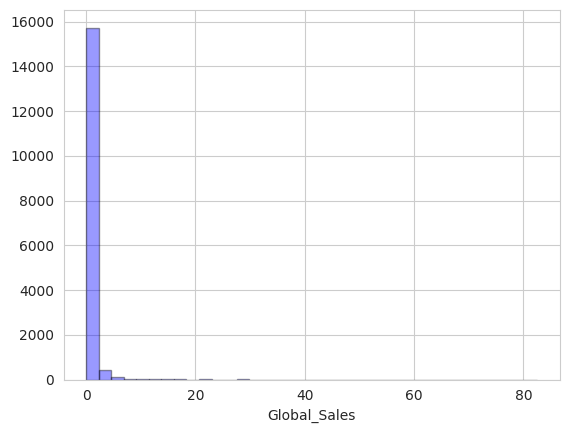

In [ ]:
sns.distplot(df['Global_Sales'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
print(df['Global_Sales'].value_counts())
print("max = {}", df['Global_Sales'].max())
print("min = {}", df['Global_Sales'].min())

<Axes: xlabel='Global_Sales_normal'>

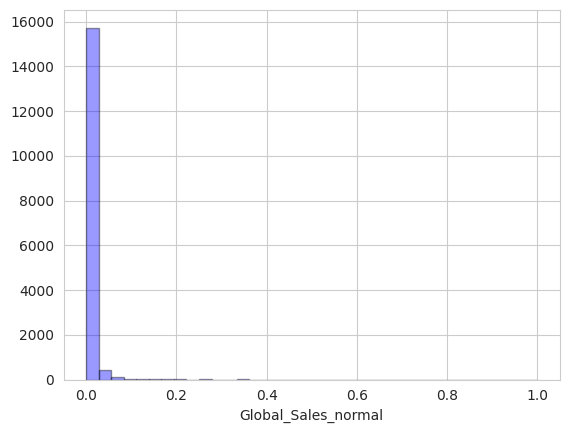

In [ ]:
df['Global_Sales_normal'] = 0  # заполняем сначала значения нового признака нулями
GS_max = df['Global_Sales'].max()
for i, row in df.iterrows():
  df['Global_Sales_normal'] = df['Global_Sales'] / GS_max

sns.distplot(df['Global_Sales_normal'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

low_sales     8107
mid_sales     5325
high_sales    1888
bestseller    1096
Name: Global_Sales_category, dtype: int64


<Axes: >

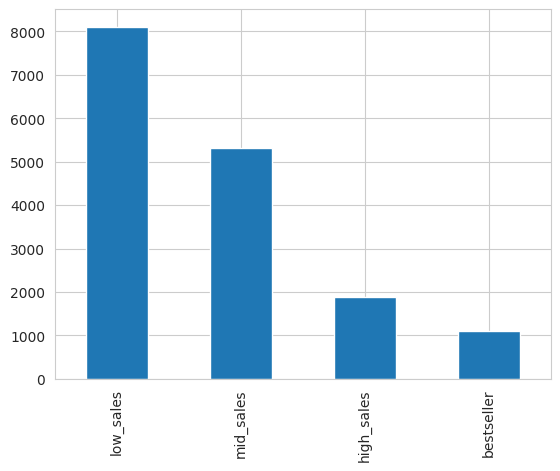

In [ ]:
df['Global_Sales_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[(df['Global_Sales_normal'] < 0.002), 'Global_Sales_category'] = "low_sales"
df.loc[(df['Global_Sales_normal'] >= 0.002) & (df['Global_Sales_normal'] < 0.008), 'Global_Sales_category'] = "mid_sales"
df.loc[(df['Global_Sales_normal'] >= 0.008) & (df['Global_Sales_normal'] < 0.02), 'Global_Sales_category'] = "high_sales"
df.loc[(df['Global_Sales_normal'] >= 0.02), 'Global_Sales_category'] = "bestseller"
vc = df['Global_Sales_category'].value_counts()
print(vc)
vc.plot(kind='bar')

Удалим колонку с именем, т.к. она лишняя для анализа

In [ ]:
df = df.drop(columns=['Name'])
df

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_category,Platform_category,Genre_int,Global_Sales_normal,Global_Sales_category
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,6,3,1,1.000000,bestseller
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,34.0,84.0,3.0,361.0,Nintendo,E10+,2,2,2,0.487580,bestseller
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,6,3,3,0.430389,bestseller
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,6,3,1,0.397068,bestseller
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,48.0,70.0,3.0,5754.0,Next Level Games,M,4,3,4,0.380104,bestseller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,65.0,73.0,5.0,4462.0,Omega Force,M,8,2,9,0.000121,low_sales
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,62.0,15.0,4.0,102.0,IR Gurus,E,6,2,1,0.000121,low_sales
16716,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,67.0,19.0,7.0,95.0,"Neverland, Idea Factory",T,8,3,11,0.000121,low_sales
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,61.0,27.0,8.0,110.0,Tecmo,T,5,3,2,0.000121,low_sales


## Начнем проводить анализ признаков

Посмотрим какой шанс у игры стать бестселлером и какой шанс стать низко продаваемой:

In [ ]:
listOfGSc = dict(df['Global_Sales_category'].value_counts())
print(listOfGSc)
max = 0
for x in listOfGSc.values():
  max += x
print("Chance to be bestseller: {:.1f}%".format((listOfGSc["bestseller"]/max) *100))
print("Chance to be low_sales: {:.1f}%".format((listOfGSc["low_sales"]/max) *100))

{'low_sales': 8107, 'mid_sales': 5325, 'high_sales': 1888, 'bestseller': 1096}
Chance to be bestseller: 6.7%
Chance to be low_sales: 49.4%


Почти 50% шанс у игры стать низко продаваемой

Признак **Platform**

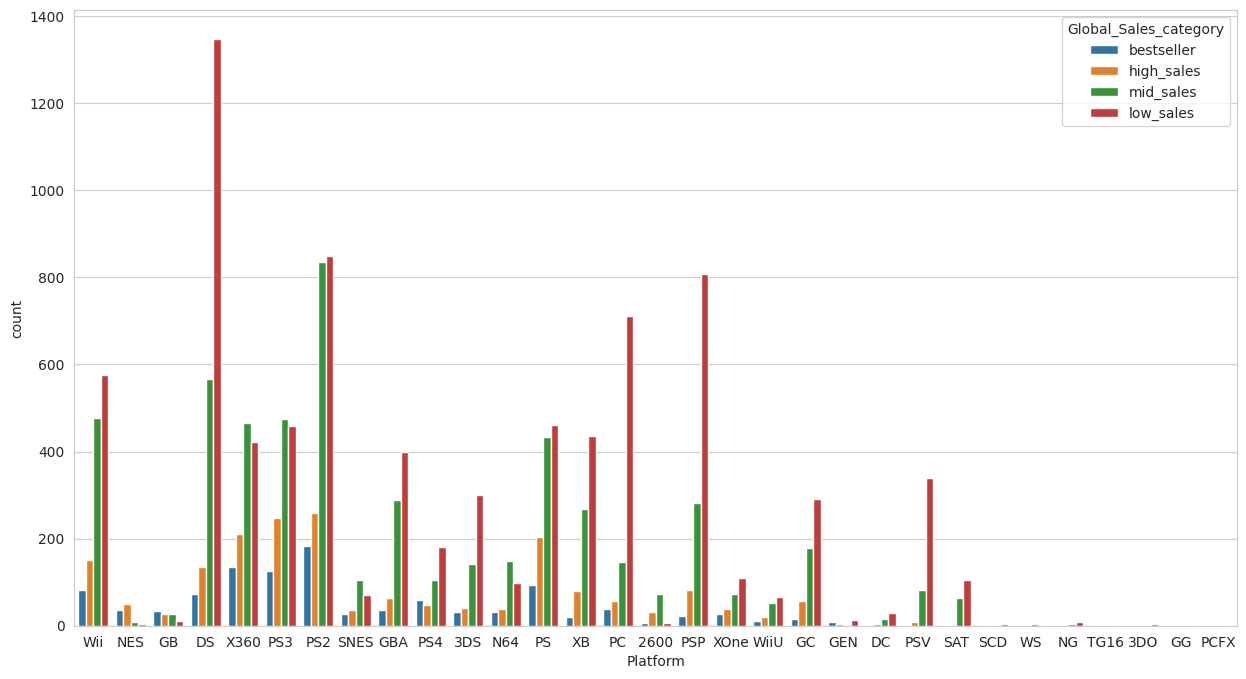

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Platform', hue='Global_Sales_category', data=df);

Проверим на каких платформах выходили бестселлеры и плохо продаваемые игры в последние 5 лет.

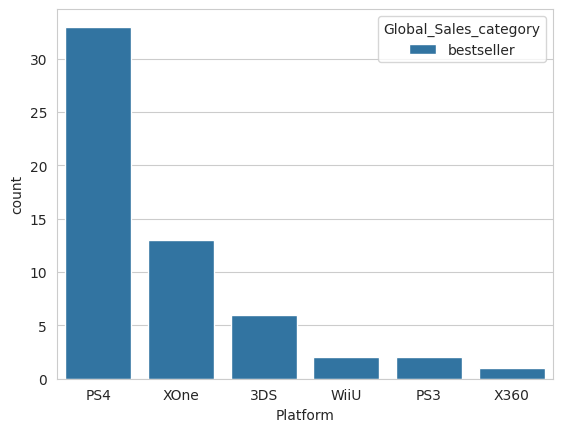

In [ ]:
sns.countplot(x='Platform', hue='Global_Sales_category', data=df.loc[(df['Global_Sales_category'] == "bestseller") & (df['Year_category'] == 8)]);

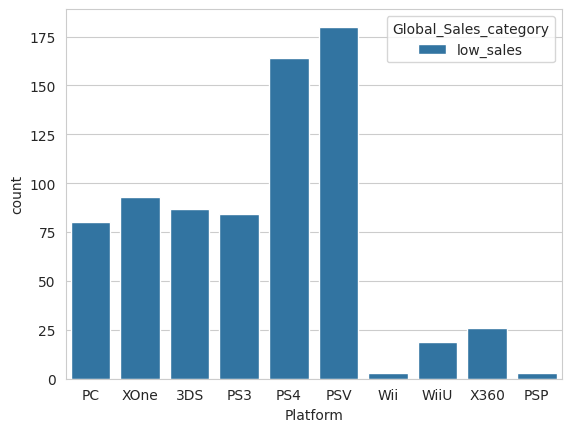

In [ ]:
sns.countplot(x='Platform', hue='Global_Sales_category', data=df.loc[(df['Global_Sales_category'] == "low_sales") & (df['Year_category'] == 8)]);

В последние 5 лет бестселлеры и плохие игры выходят на PS4. Но больше всего низко продаваемых игр вышло на PSV.

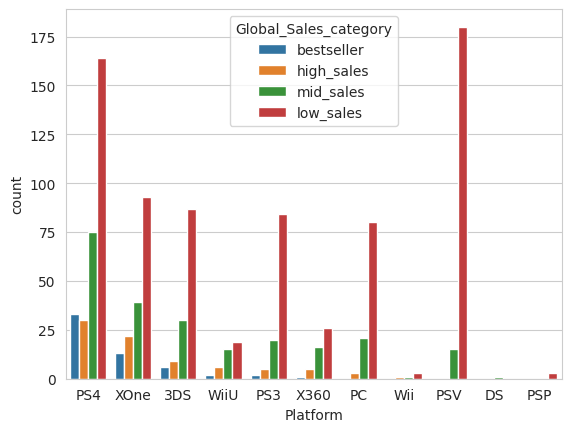

In [ ]:
sns.countplot(x='Platform', hue='Global_Sales_category', data=df.loc[(df['Year_category'] == 8)]);

За последние 5 лет в топе по количеству игр находится приставка PS4, а в анти топе PSP, Wii и DS.

Признак **Platform_category**

<Axes: xlabel='Platform_category', ylabel='Count'>

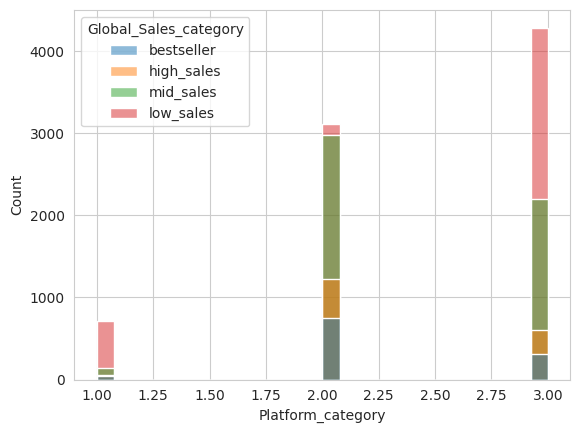

In [ ]:
sns.histplot(data=df, x="Platform_category", hue="Global_Sales_category")

На данном графике хорошо видно, что количество игр на ПК значительно меньше, чем на консоли и портативной консоли. Также заметно, что на стационарные консоли практически не выходит низко продаваемых игр, а значит для разработчика приоритетны эти виды платформ. Также заметим, что на портативные консоли выходит больше всего игр, но они хуже продаются, чем на стационарные приставки.

Признак **Year_category** (вместо Year_of_Release)

<Axes: xlabel='Year_category', ylabel='Count'>

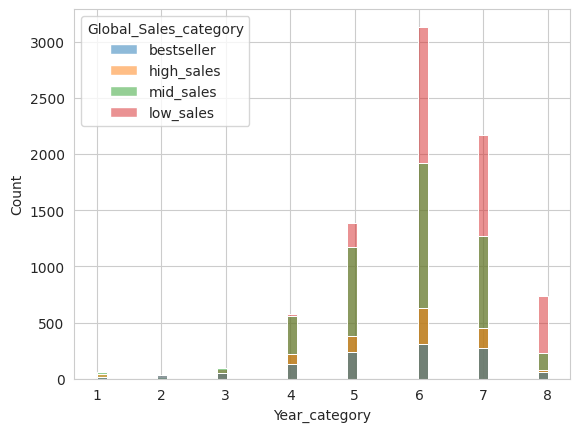

In [ ]:
sns.histplot(data=df, x="Year_category", hue="Global_Sales_category")

По данному признаку видно, что за последние 20 лет выпускается больше игр чем раньше, однако и игр с низкой продаваемостью стало больше.

Рассмотрим игры до 2000-ого года.

<Axes: xlabel='Platform_category', ylabel='Year_category'>

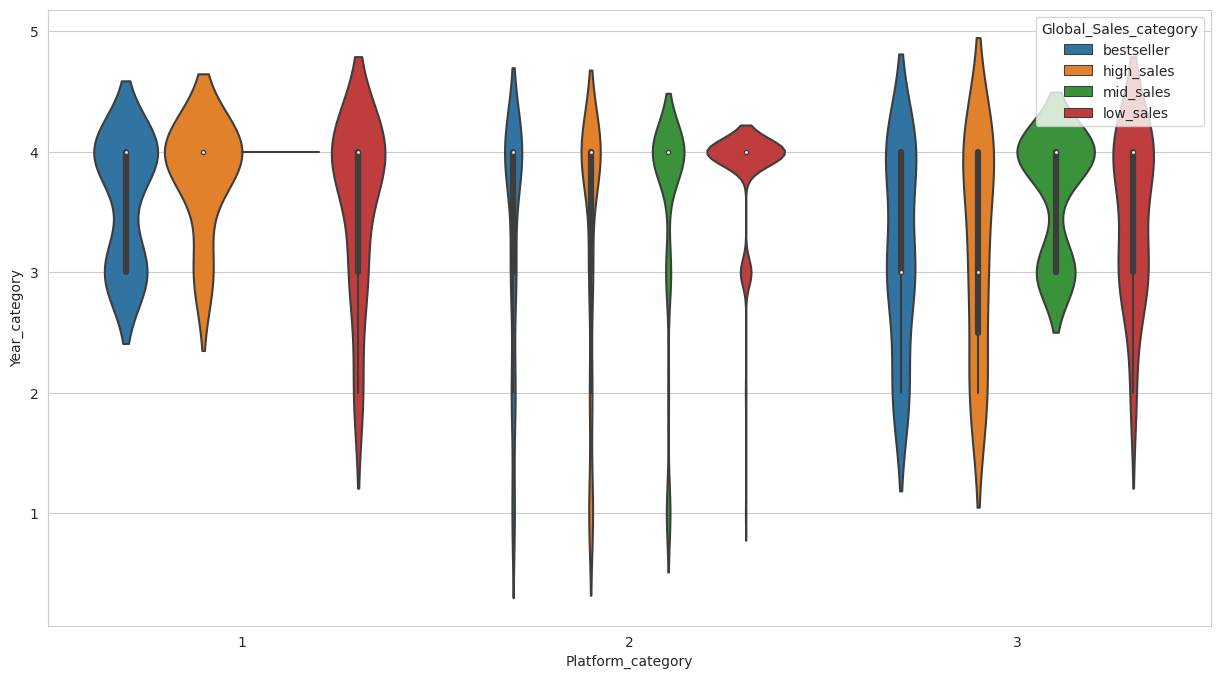

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df.loc[(df['Year_category'] < 5)], y="Year_category",  x="Platform_category", hue="Global_Sales_category")

На основе графика категорий лет, категорий платформ и категорий продаж можно сказать, что в 1980-1985гг игры появлились в основном только на стационарные приставки, а ближе к 2000м компьютер стал популярной платформой для игр. Так же можно сказать, что в 1980-1990гг из-за малого количества игр, подавляющее большинство из них не было неудачными в продажах.

Признак **Genre_int** (вместо Genre)

<Axes: xlabel='Genre_int', ylabel='count'>

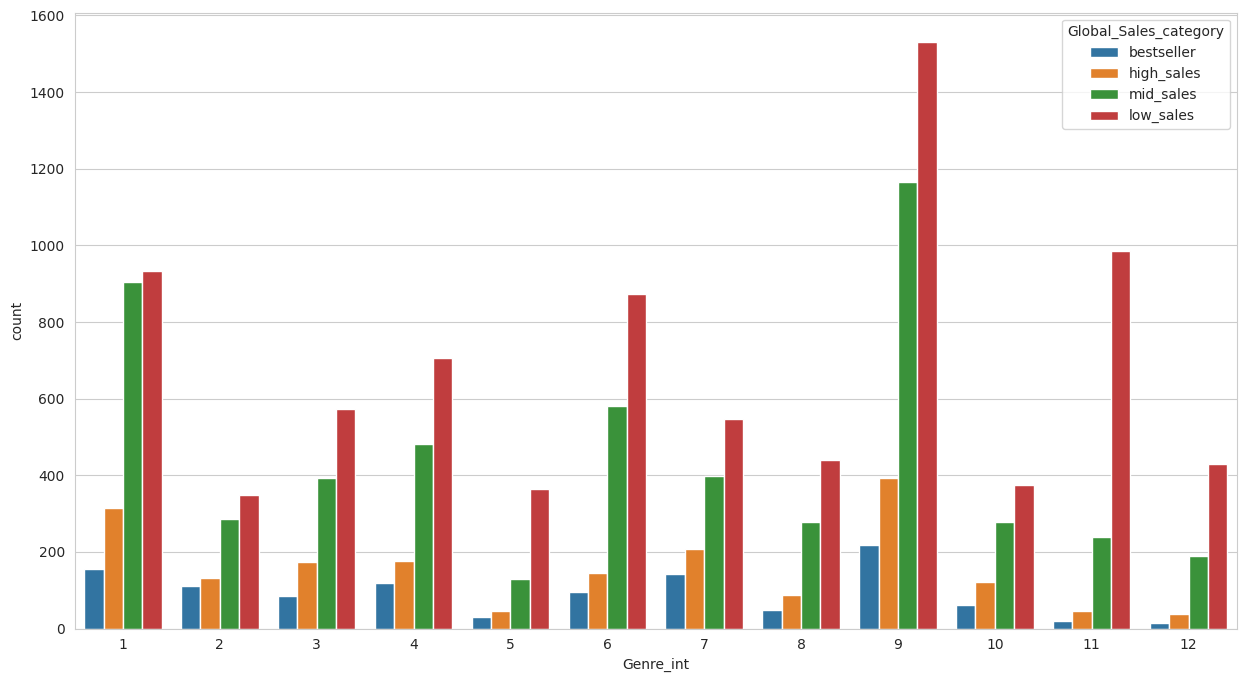

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="Genre_int", hue="Global_Sales_category")

На основании данного графика можно сказать, что плохо продаваемыми были жанры Экшен и Путешествия, однако Экшен игры так же и лидеры по продажам, а вот Путешествия аутсайдеры. Значит если мы не хотим провалиться, то делать игру в жанре путешествия - не нужно.

<Axes: xlabel='Genre_int', ylabel='Year_category'>

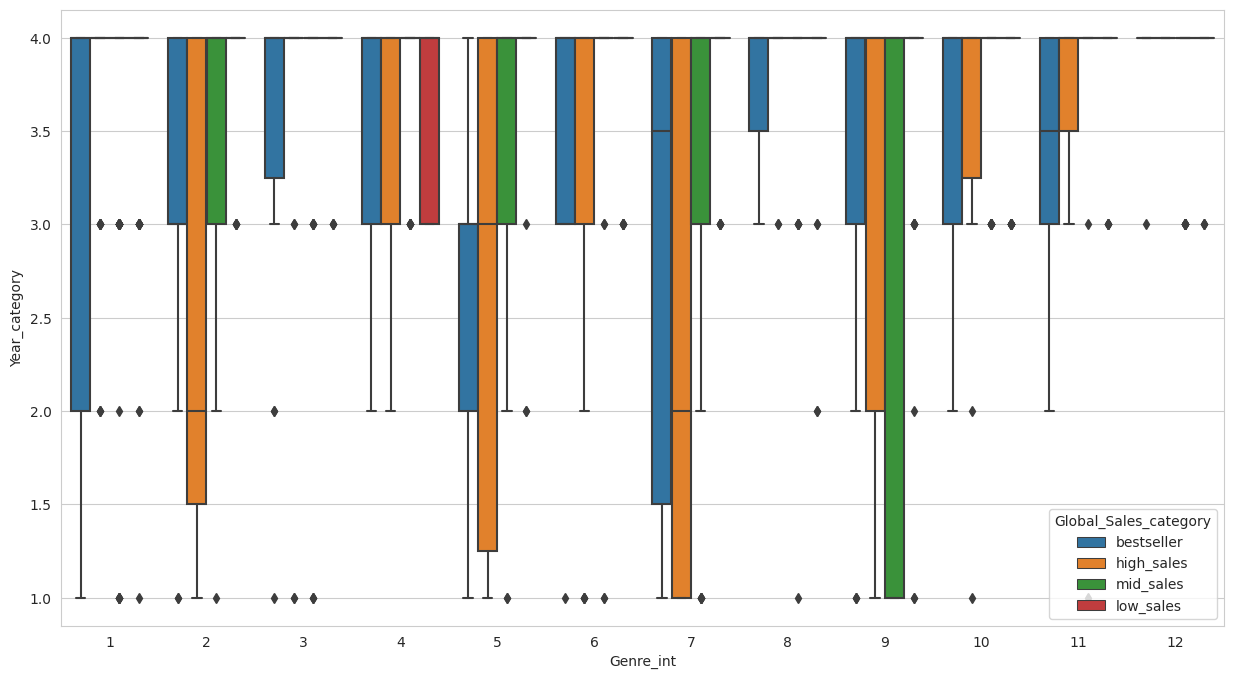

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.loc[(df['Year_category'] < 5)], y="Year_category",  x="Genre_int", hue="Global_Sales_category")

Добавив к измерениям год выхода игры можно сказать, что в 1980-1985 гг популярными были игры в жанре экшен и шутер.

Признак **Publisher**

<Axes: xlabel='Publisher', ylabel='count'>

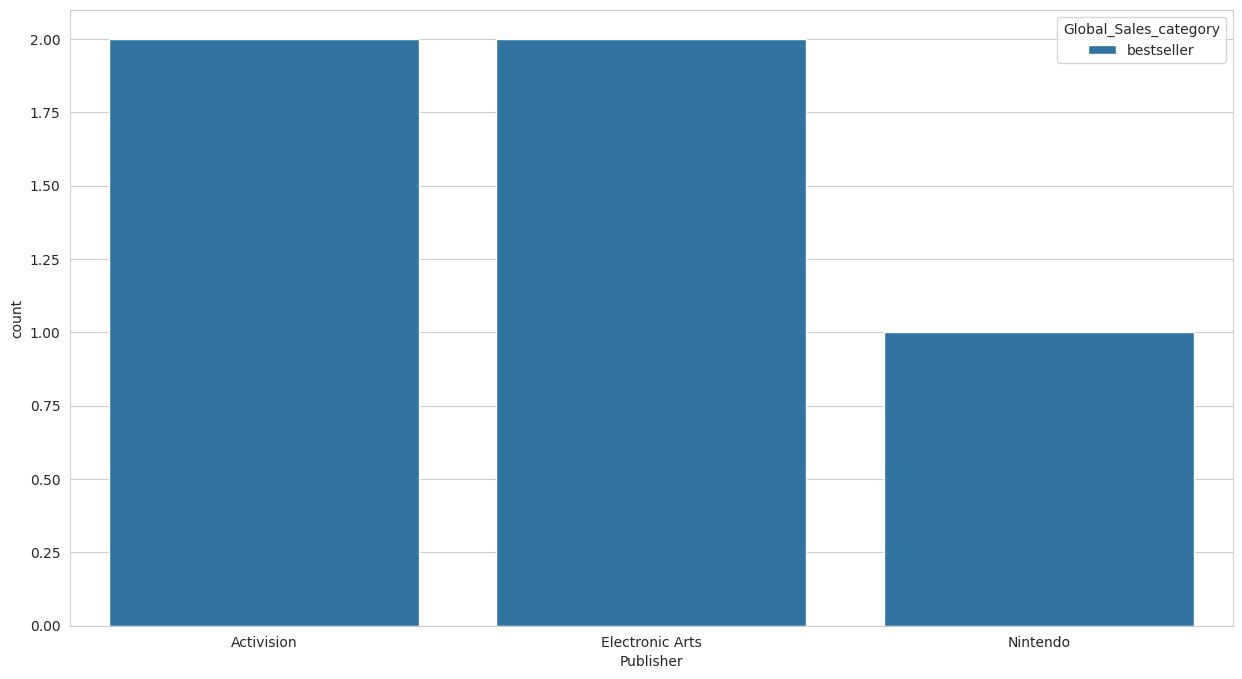

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df.loc[(df['Year_category'] > 7)].sort_values('Global_Sales_category', ascending=True).head(5), x="Publisher", hue="Global_Sales_category")

По этому признаку можно сказать, что топовые издательства игр за последние 10 лет - это EA, Activision и Nintendo

Признаки **NA_Sales, EU_Sales, JP_Sales, Other_Sales**

([<matplotlib.patches.Wedge at 0x7feec56b7160>,
 [Text(0.026400968535135353, 1.0996831311156896, 'NA_Sales'),
  Text(-0.7606782650026737, -0.7945870481907709, 'EU_Sales'),
  Text(0.5768633705718926, -0.9366048535494761, 'JP_Sales'),
  Text(1.0574143381101384, -0.30310875533230364, 'Other_Sales')])

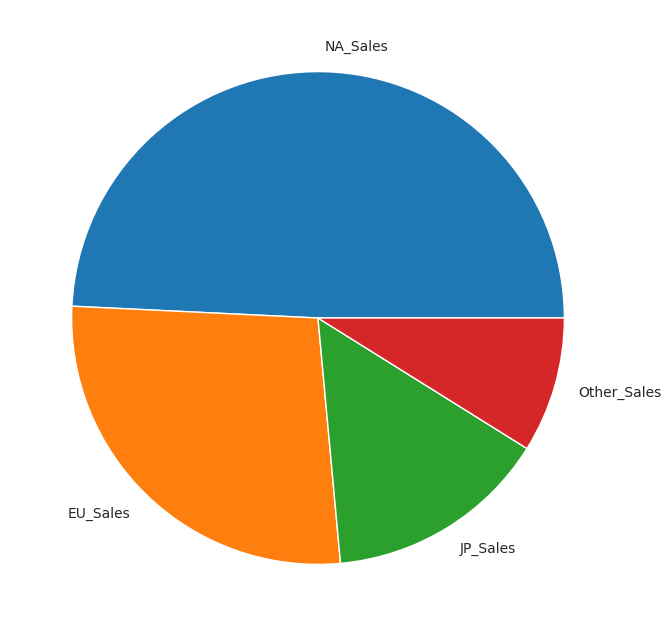

In [ ]:
na = df["NA_Sales"].sum()
eu = df["EU_Sales"].sum()
jp = df["JP_Sales"].sum()
oth = df["Other_Sales"].sum()

x=[na, eu, jp, oth]
y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.pie(x, labels=y)

На графике продаж можно сказать, что активнее всего покупают игры в Северной Америке, и чуть меньше в ЕС. Япония вместе с остальными миром покупают игры намного меньше раз.

Признаки  **User_Score, Critic_Score, User_Count, Critic_Count**

<Axes: xlabel='User_Score', ylabel='Global_Sales_category'>

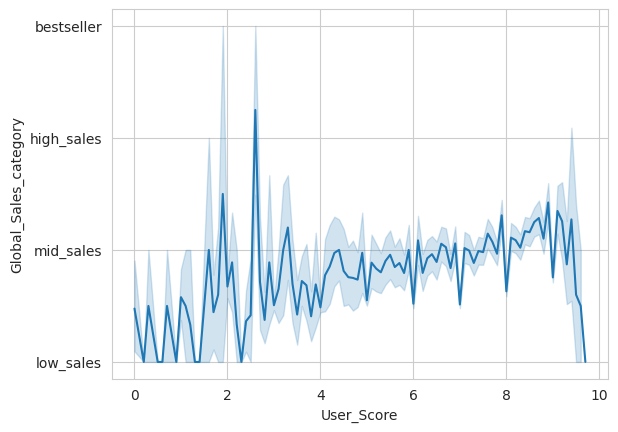

In [ ]:
sns.lineplot(data=df, x="User_Score", y="Global_Sales_category")

<Axes: xlabel='Critic_Score', ylabel='Global_Sales_category'>

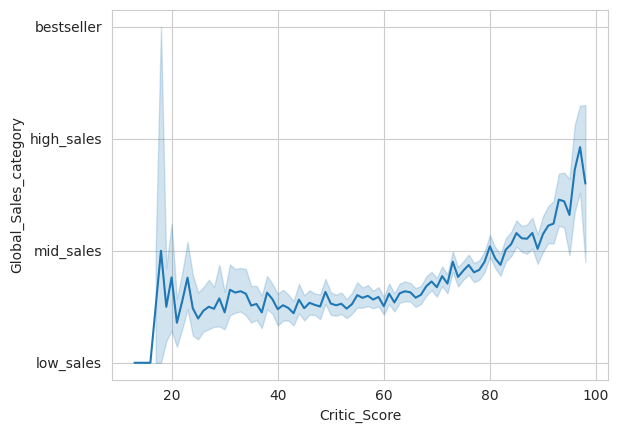

In [ ]:
sns.lineplot(data=df, x="Critic_Score", y="Global_Sales_category")

Приведенные выше графики свидетельствуют о том, что положительные оценки критиков повышают продажи игр. А пользователи активнее ставят двойки играм, которые были распиарены и приобретены.

<Axes: xlabel='User_Score', ylabel='User_Count'>

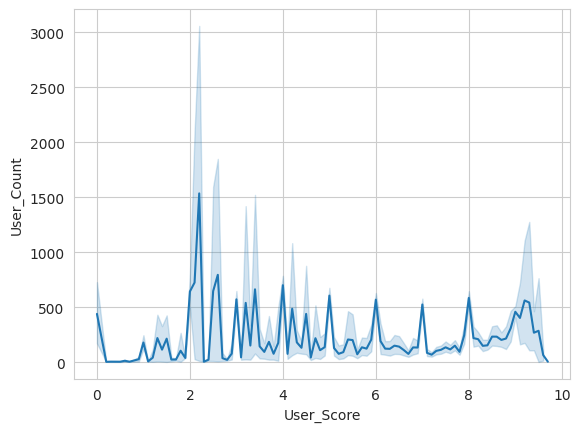

In [ ]:
sns.lineplot(data=df, x="User_Score", y="User_Count")

<Axes: xlabel='Critic_Score', ylabel='Critic_Count'>

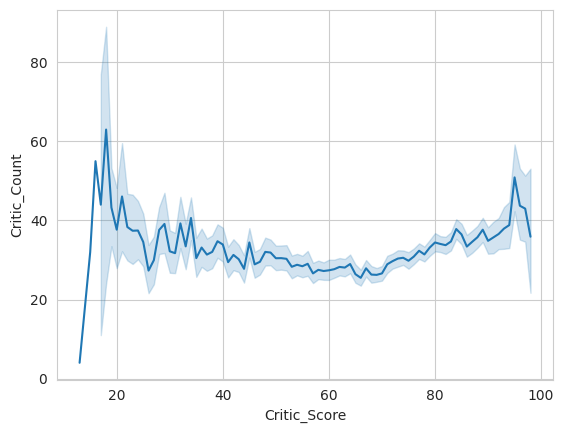

In [ ]:
sns.lineplot(data=df, x="Critic_Score", y="Critic_Count")

На данных двух графиках видно, что пользователи и критики активнее ставят либо строго положительные либо строго отрицательные оценки, в отличие от оценок "по середине".

Признак **Developer**

<Axes: xlabel='Developer', ylabel='count'>

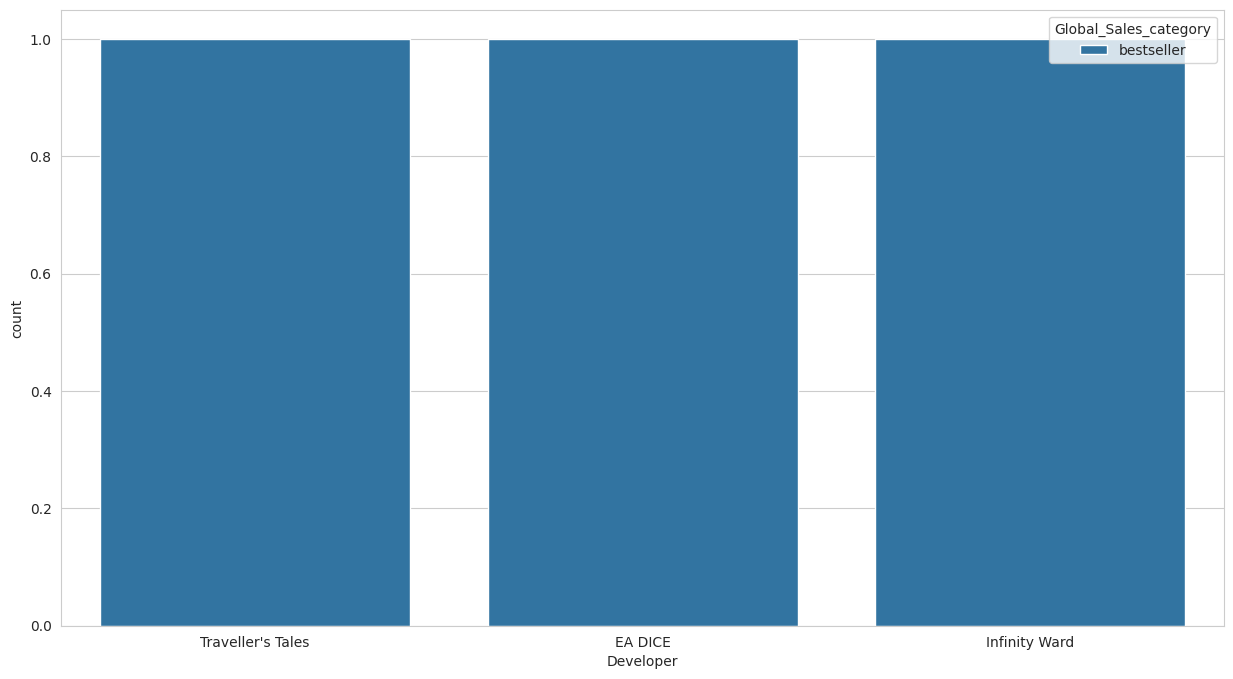

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=(df.loc[(df['Year_category'] > 7)].sort_values('Global_Sales_category', ascending=True)).head(3), x="Developer", hue="Global_Sales_category")

За последние 10 лет топ 3 девелопера игр это Traveller's Tales, EA DICE и Infinity Ward.

Признак **Rating**

<Axes: xlabel='Rating', ylabel='Count'>

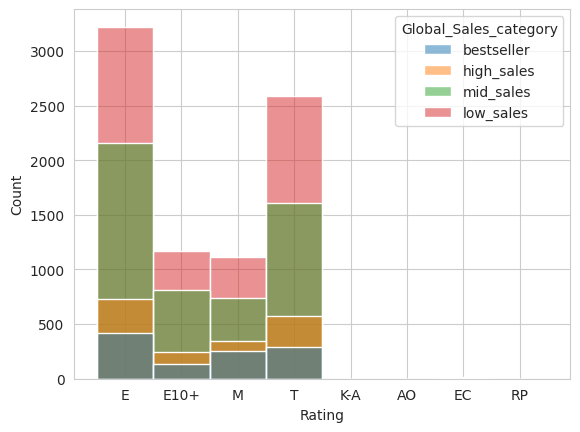

In [ ]:
sns.histplot(data=df, x="Rating", hue="Global_Sales_category")

По учету рейтинга наиболее популярными являются игры с рейтингом "Для всех" и "Для тинейджеров".

# Корреляция признаков

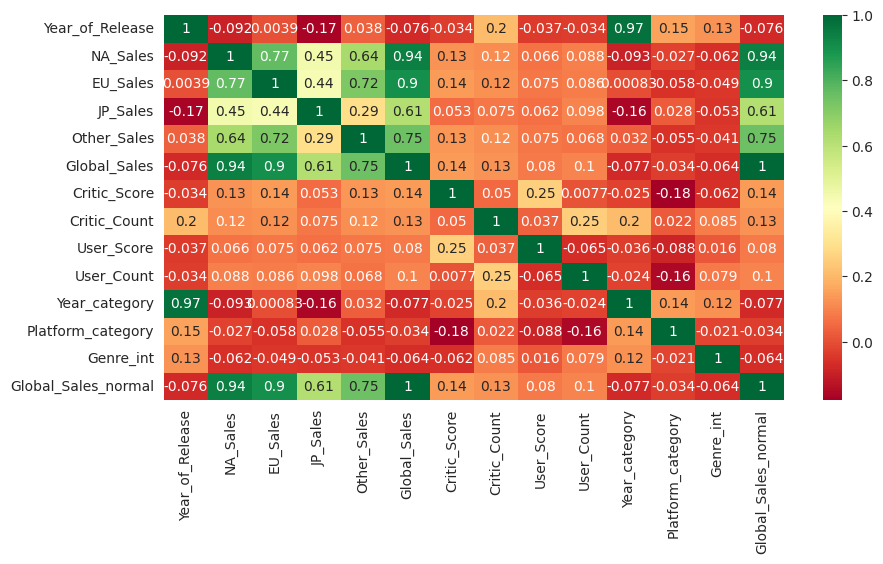

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Удалим лишние, преобразуем категории глобальных продаж в числовой признак.

In [ ]:
df['Global_Sales_category'].replace(['low_sales', "mid_sales", "high_sales", "bestseller"], [1, 2, 3, 4], inplace=True)

In [ ]:
df_new = df.drop(columns=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Year_of_Release", "Genre", "Platform", "Global_Sales", "Global_Sales_normal"])

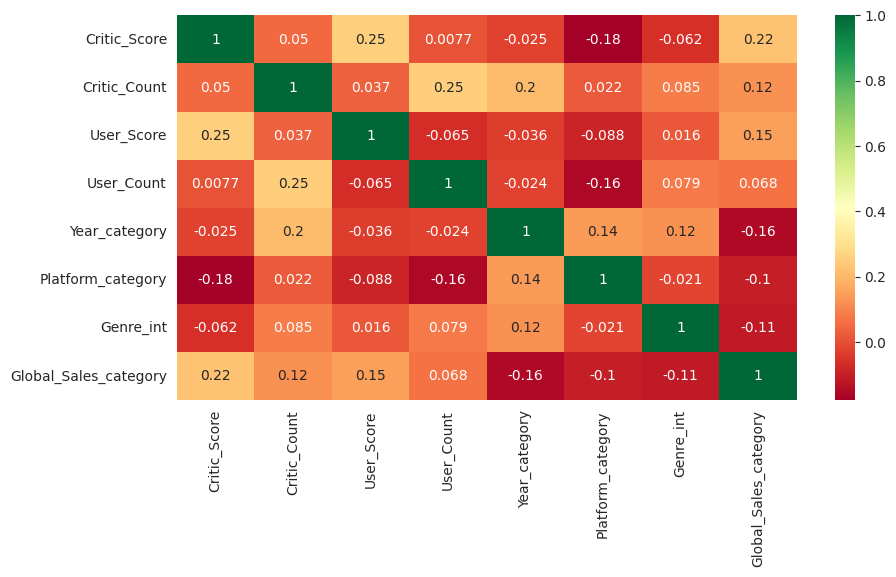

In [ ]:
sns.heatmap(df_new.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Видим, что продажи имеют слабую корреляцию с оценками пользователей и критиков.

## Вывод: в данном датасете есть коррелирующие признаки и он интересен для предсказания продаж новой игры.